In [135]:
#Importar las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [136]:
#Cargar los datos desde mi repositorio de github
df = pd.read_csv("https://raw.githubusercontent.com/jkmg/Iris/main/Iris.csv", delimiter = ",")
df.drop(columns = "Id", inplace = True)
print(df)
#Descripcción analítica de variables numéricas
df.describe().T

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]


,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [137]:
#Descripción analítica de variables categóricas
df.describe(include=object).T

,count,unique,top,freq
Species,150,3,Iris-setosa,50


<AxesSubplot:>

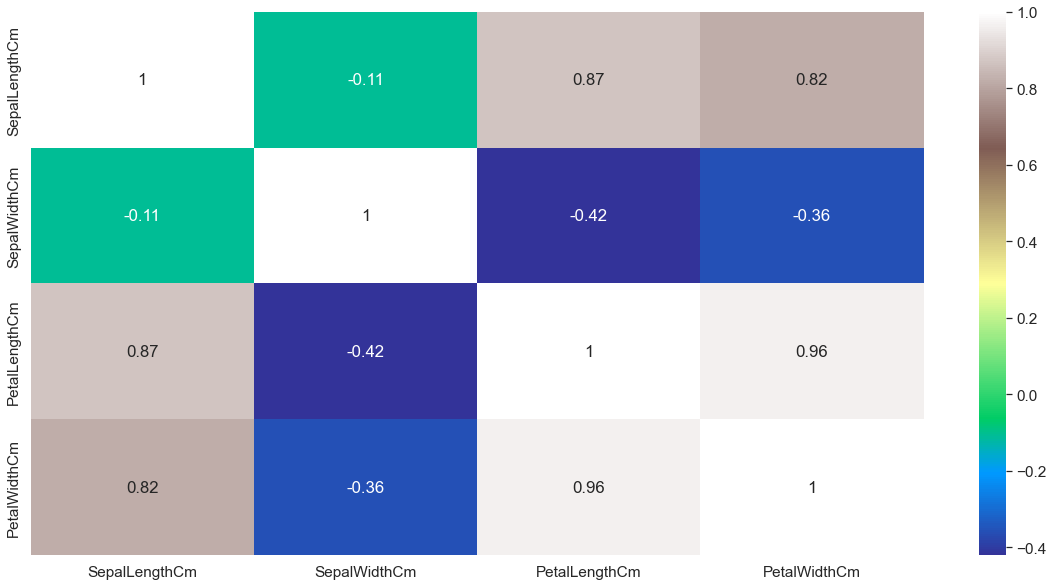

In [138]:
#Correlación entre variables numéricas
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='terrain')

### En la matrix de correlación de arriba se puede observar una muy alta correlación (y con mismo signo) entre las variables PetalLengthCm y PetalWidthCm. Esto indican que ambas variables se comportan de forma muy parecida y, por tanto, es probable que podamos descartar una de ellas para generar el modelo de predicción.

/opt/anaconda3/envs/venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

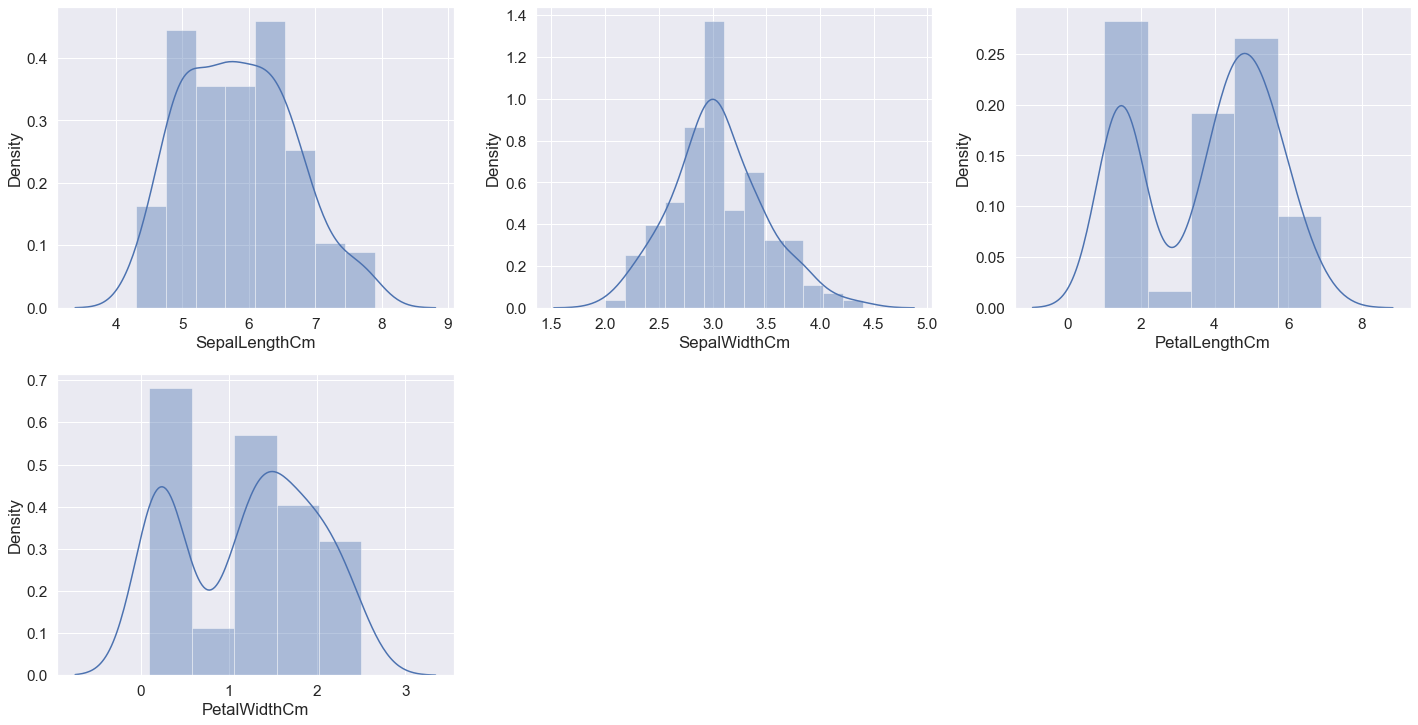

In [139]:
#Seleccionar el dataset de variables numéricas y ver su distribución de valores
numerical = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].copy()

plt.figure(figsize=(20,20))
index = 0
for index, feature in enumerate(numerical):
    index += 1
    plt.subplot(4, 3, index)
    plt.tight_layout()
    sns.distplot(numerical[feature])

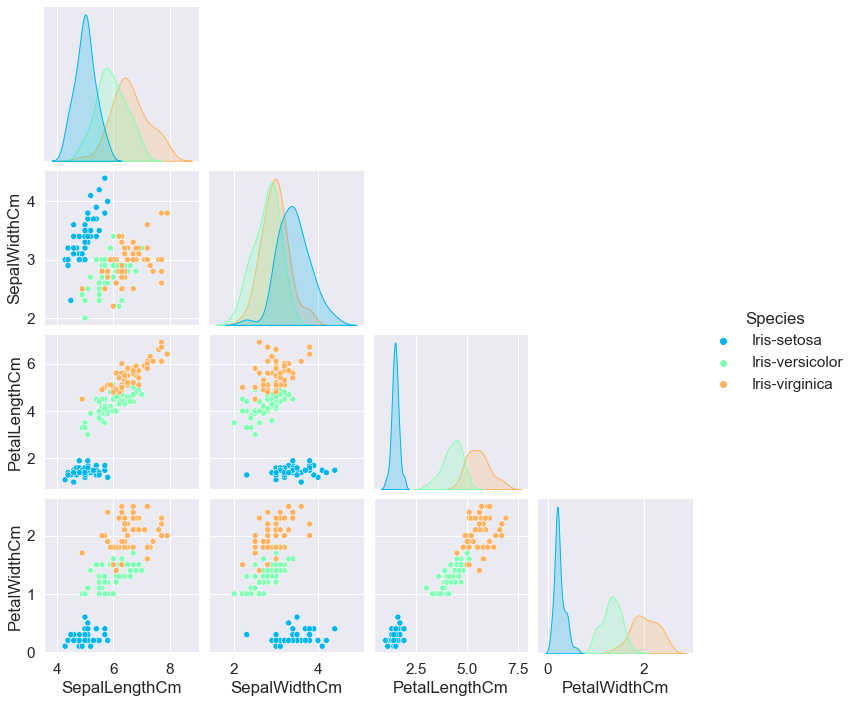

In [140]:
#Visualización de la distribución de valores de cada pareja de variables numéricas 
sns.pairplot(df, hue="Species", palette="rainbow", corner=True)

In [141]:
#Conversión de la variable categórica Species en numérica
species_mapper = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
def species_encode(val):
    return species_mapper[val]

df['Species'] = df['Species'].apply(species_encode)
print(df)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0              5.1           3.5            1.4           0.2        0
1              4.9           3.0            1.4           0.2        0
2              4.7           3.2            1.3           0.2        0
3              4.6           3.1            1.5           0.2        0
4              5.0           3.6            1.4           0.2        0
..             ...           ...            ...           ...      ...
145            6.7           3.0            5.2           2.3        2
146            6.3           2.5            5.0           1.9        2
147            6.5           3.0            5.2           2.0        2
148            6.2           3.4            5.4           2.3        2
149            5.9           3.0            5.1           1.8        2

[150 rows x 5 columns]


In [142]:
#Cálculo de la Multicolinealidad de las variables numéricas mediante el variance inflation factor (VIF) 
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Construcción de la matriz para la regresión lineal usando Species como variable respuesta
y, X = dmatrices('Species ~ SepalLengthCm+SepalWidthCm+PetalLengthCm+PetalWidthCm', data=df, return_type='dataframe')

#Cálculo del VIF para cada variable numérica que queremos usar para predecir la variable Species
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns
vif

,VIF,variable
0,130.983718,Intercept
1,7.103113,SepalLengthCm
2,2.099039,SepalWidthCm
3,31.397292,PetalLengthCm
4,16.141564,PetalWidthCm


###  Data el elevado valor de VIF de la variable PetalLenghtCm (mucho mayor que el límite de 10) y su alta correlación con PetalWidthCm, no tendremos en cuenta la variable PetalLenghtCm para la generación del modelo

In [143]:
#Importar librerias necesarias
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import pickle

In [144]:
# Selección de variables y generación de datasets de entrenamiento y test
X = df.drop(["Species", "PetalLengthCm"], axis=1) #Selección de las variables a usar para la predicción
y = df["Species"] #Selección de la variable a predecir

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 40)

In [145]:
# Modelo Random Forest
rf = RandomForestClassifier(n_estimators=30, criterion = 'entropy', random_state=50, class_weight='balanced', max_depth=5)
rfmodel = rf.fit(X_train, y_train)
rfpred = rfmodel.predict(X_test)
rfaccuracy = accuracy_score(y_test,rfpred)

print(f'La precisión del modelo Random Forest es: {rfaccuracy}')

# Guardar el modelo Random Forest
pickle.dump(rfmodel, open('iris_rf.pkl', 'wb'))

La precisión del modelo Random Forest es: 1.0


In [146]:
# Logistic Regression
lr=LogisticRegression(class_weight=None, random_state=101, solver='saga', max_iter=10000)

lrmodel=lr.fit(X_train,y_train)
lrpred=lrmodel.predict(X_test)
lraccuracy = accuracy_score(y_test,lrpred)
lrcoefficients = lr.coef_[0]

print(f'La precisión del modelo Logistic Regression es: {lraccuracy}')
# Lista de coeficientes que indican la contribución de cada variable al modelo de predicción, 
# siguiendo el orden de las variables en el dataframe X
print(f'Los coeficientes del modelo Logistic Regression son: {lrcoefficients}') 

# Guardar el modelo Logistic Regression
pickle.dump(lrmodel, open('iris_lr.pkl', 'wb'))

La precisión del modelo Logistic Regression es: 1.0
Los coeficientes del modelo Logistic Regression son: [-1.22549537  1.65684512 -2.61930975]


In [151]:
# K-Nearest Neighbors Classifier (KNN)
knn = KNeighborsClassifier()
knnmodel = knn.fit(X_train, y_train) 
knnpred = knnmodel.predict(X_test)
knnaccuracy = accuracy_score(y_test,knnpred)
print(f'La precisión del modelo KNN es: {knnaccuracy}')

# Guardar el modelo KNN
pickle.dump(knnmodel, open('iris_knn.pkl', 'wb'))

La precisión del modelo KNN es: 0.9777777777777777


/opt/anaconda3/envs/venv/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [153]:
# Support Vector Classifier (SVC)
svc = SVC(random_state=101, class_weight=None)
svcmodel = svc.fit(X_train, y_train) 
svcpred = svcmodel.predict(X_test)
svcaccuracy = accuracy_score(y_test,svcpred)
svccoefficients = lr.coef_[0]

print(f'La precisión del modelo SVC es: {svcaccuracy}')
# Lista de coeficientes que indican la contribución de cada variable al modelo de predicción, 
# siguiendo el orden de las variables en el dataframe X
print(f'Los coeficientes del modelo SVC son: {svccoefficients}')

# Guardar el modelo SVC
pickle.dump(svcmodel, open('iris_svc.pkl', 'wb'))

La precisión del modelo SVC es: 0.9777777777777777
Los coeficientes del modelo SVC son: [-1.22549537  1.65684512 -2.61930975]


### He seleccionado el modelo de clasificación Logistic Regression como el más idóneo para predecir la variable Species del dataset Iris. Esta decisión se basa en la necesidad de predecir la variable categórica Species, la cual puede tomer 3 valores (Iris-setosa, Iris-versicolor, Iris-virginica). Además, Logistic Regression genera modelos de fácil interpretación, ya que proporciona los coeficientes con los que contribuye cada variable independiente a la predicción de la variable independiente (Species). Igualmente, Logistic Regression da lugar, junto a Random Forest, al modelo de clasificación de mayor precisión (100%).